
# Fitting noisy data

Many baseline correction algorithms were created without considering noise
in the experimental data, which can lead to an underestimation of the baseline.
This example will show how to reduce this issue by simply smoothing the data
before performing baseline correction.

Two algorithms will be compared: :meth:`~.Baseline.modpoly`, which is not suited for noisy
data, and :meth:`~.Baseline.imodpoly`, which is a modification of the modpoly algorithm
created specifically to address noise.


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import uniform_filter1d

from pybaselines import Baseline
from pybaselines.utils import gaussian


x = np.linspace(0, 1000, 900)
signal = (
    gaussian(x, 9, 100, 12)
    + gaussian(x, 6, 180, 5)
    + gaussian(x, 8, 350, 11)
    + gaussian(x, 15, 400, 18)
    + gaussian(x, 6, 550, 6)
    + gaussian(x, 13, 700, 8)
    + gaussian(x, 9, 800, 9)
    + gaussian(x, 9, 880, 7)
)
baseline = 5 + 10 * np.exp(-x / 600)
noise = np.random.default_rng(0).normal(0, 0.6, len(x))
y = signal + baseline + noise

baseline_fitter = Baseline(x_data=x)

Smoothing will be performed using a simple 11-point moving average. Other
types of smoothing include Savitzky-Golay smoothing, Gaussian smoothing,
Whittaker smoothing, or wavelet-based smoothing.



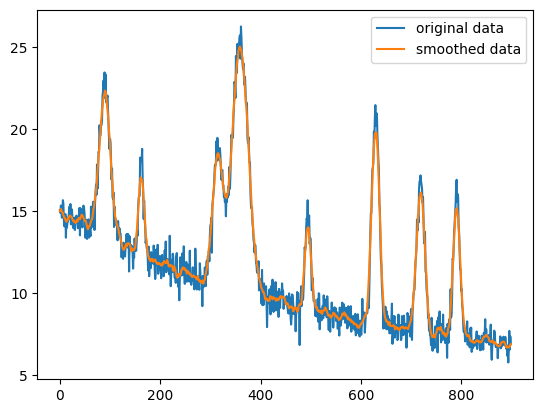

In [17]:
smooth_y = uniform_filter1d(y, 11)

plt.figure()
plt.plot(y, label='original data')
plt.plot(smooth_y, label='smoothed data')
plt.legend()

The modpoly fits of both the original data and the smoothed data are
shown below. It is clear that the fit for the original data underestimates
the baseline due to noise, while the modpoly fit of the smoothed data is
much closer to the true baseline.



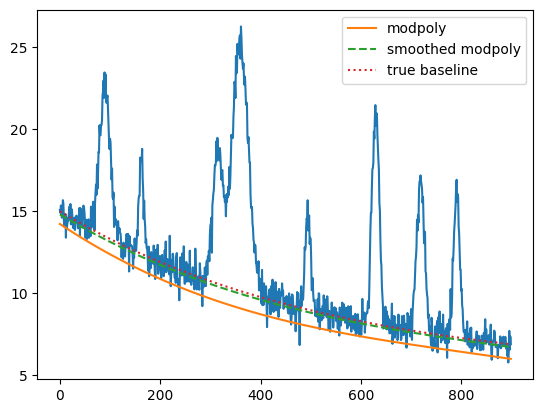

In [18]:
regular_modpoly = baseline_fitter.modpoly(y, poly_order=3)[0]
smoothed_modpoly = baseline_fitter.modpoly(smooth_y, poly_order=3)[0]
plt.figure()
plt.plot(y)
plt.plot(regular_modpoly, label='modpoly')
plt.plot(smoothed_modpoly, '--', label='smoothed modpoly')
plt.plot(baseline, ':', label='true baseline')
plt.legend()

Unlike the modpoly, the imodpoly function fits the noisy data quite
well. Smoothing the input has little effect, with both the original
and smoothed data producing similar results.



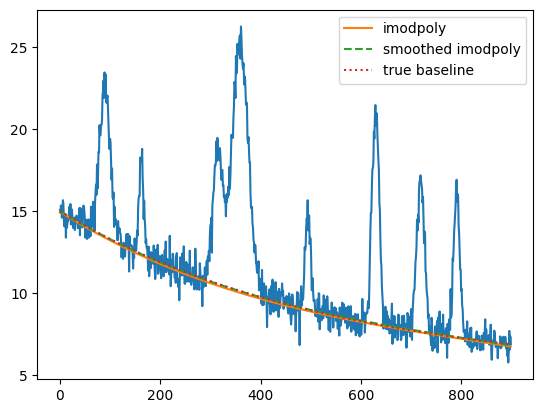

In [19]:
regular_imodpoly = baseline_fitter.imodpoly(y, poly_order=3, num_std=0.7)[0]
smoothed_imodpoly = baseline_fitter.imodpoly(smooth_y, poly_order=3, num_std=0.7)[0]

plt.figure()
plt.plot(y)
plt.plot(regular_imodpoly, label='imodpoly')
plt.plot(smoothed_imodpoly, '--', label='smoothed imodpoly')
plt.plot(baseline, ':', label='true baseline')
plt.legend()

plt.show()